In [2]:
%matplotlib inline

from database.DataBaseModels import *
from source.ArticleParser import ArticleParser
from itertools import combinations
from collections import Counter

import pygal
import operator
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
total_digraph = nx.MultiDiGraph()


for citation in db.Citation.select():
    if citation.article_id.title != 'None' and citation.cited_by.title != 'None':
        total_digraph.add_edge(citation.cited_by, citation.article_id)
        
total_digraph.remove_edges_from([edge for edge in total_digraph.selfloop_edges()])

while True:
    try:
        for edge in nx.find_cycle(total_digraph):
            total_digraph.remove_edge(edge[0], edge[1])
    except:
        break
    
        
weakly_subgraphs_list = list(nx.weakly_connected_component_subgraphs(total_digraph))
strongly_subgraphs_list = list(nx.strongly_connected_component_subgraphs(total_digraph))

print('Number of nodes: {0}'.format(len(total_digraph.nodes)),
      'Number of edges: {0}'.format(len(total_digraph.edges)),
      'Number of weakly connected subgraphs: {0}'.format(len(weakly_subgraphs_list)),
      'Number of strongly connected subgraphs: {0}'.format(len(strongly_subgraphs_list)),
       sep='\n')

Number of nodes: 3890
Number of edges: 14885
Number of weakly connected subgraphs: 74
Number of strongly connected subgraphs: 3890


In [4]:
root_list = []
keywords = []
citation_factor = 10

for node in total_digraph.nodes:
    if not list(total_digraph.successors(node)):
        if len(list(total_digraph.predecessors(node))) == citation_factor:
            root_list.append(node)
            print(node.title)

for root in root_list:
    parser = ArticleParser()
    keywords.append(parser.parse(root.article_id)['keywords'])

Enhancing Symbolic Execution with Built-in Term Rewriting and Constrained Lazy Initialization
AUSUM: Approach for Unsupervised Bug Report Summarization
Multiplicity Computing: A Vision of Software Engineering for Next-generation Computing Platform Applications
Developer Fluency: Achieving True Mastery in Software Projects
Termination Proofs from Tests
High-impact Defects: A Study of Breakage and Surprise Defects
Start parsing article with id: 2491433
Initializing...
Getting authors...
Getting abstract...
Getting venue...
Get citations...
Successfully!!! ^_^
Start parsing article with id: 2393607
Initializing...
Getting authors...
Getting abstract...
Getting venue...
Get citations...
Successfully!!! ^_^
Start parsing article with id: 1882380
Initializing...
Getting authors...
Getting abstract...
Getting venue...
Get citations...
Successfully!!! ^_^
Start parsing article with id: 1882313
Initializing...
Getting authors...
Getting abstract...
Getting venue...
Get citations...
Successfully

In [7]:
for ls in keywords:
    for keyword in ls:
        print(keyword, end=', ')
    print()

Software analysis, Symbolic execution, 
bug report, summarization, unsupervised, 
cloud computing, data centers, multicore, virtualization, 
developer fluency, developer learning, productivity, task centrality, task difficulty, 
Machine learning, Software model checking, Termination, 
defect prediction, high-impact, process metrics, 


In [8]:
wcc_graph = weakly_subgraphs_list[0]
sources_list = []
sinks_list = []

for node in wcc_graph.nodes:
    if len(list(wcc_graph.successors(node))) == 0:
        sinks_list.append(node)
    elif len(list(wcc_graph.predecessors(node))) == 0:
        sources_list.append(node)

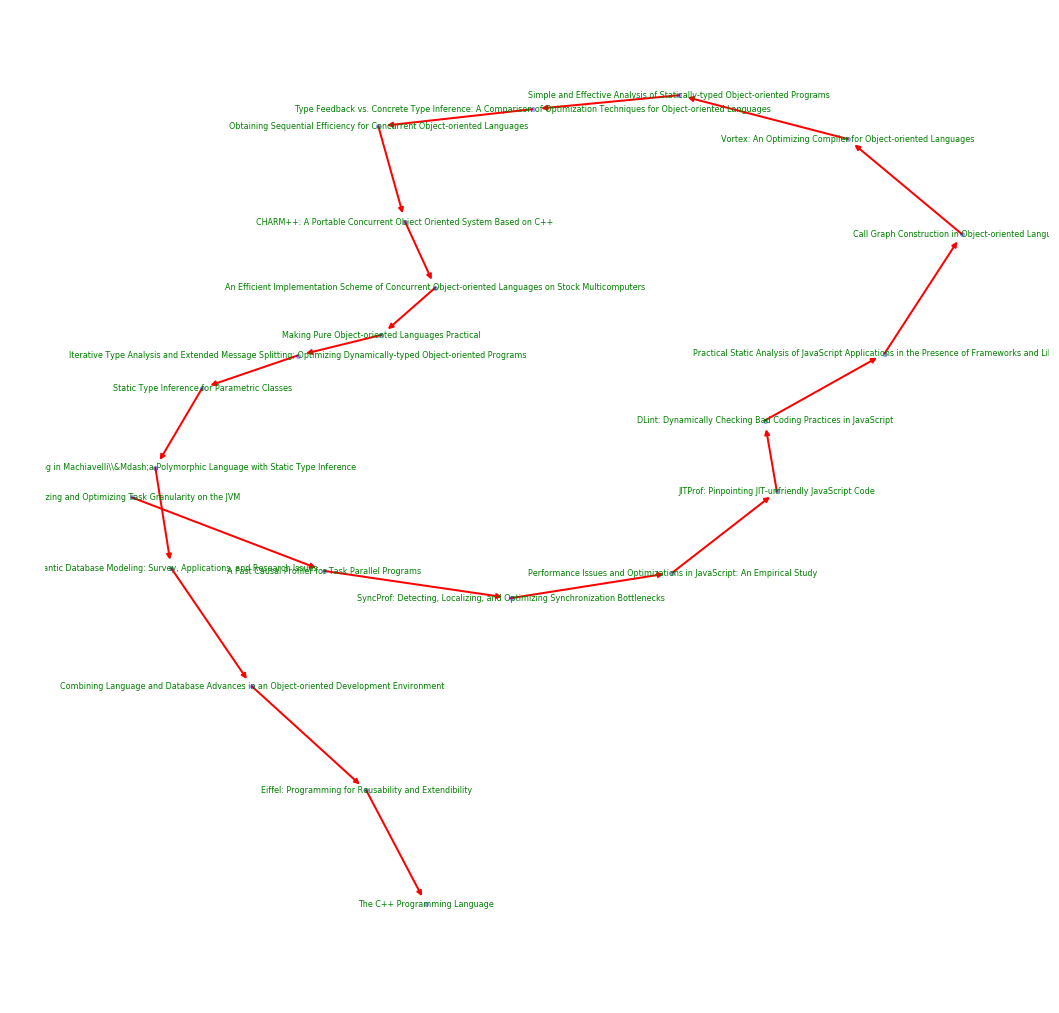

In [25]:
NODE_SIZE = 16
WIDTH = 2
NODE_COLOR = 'blue'
EDGE_COLOR = 'red'

graph = nx.DiGraph()
labels = {}
main_path = nx.dag_longest_path(wcc_graph)
for article in main_path:
    labels[article] = article.title
graph.add_path(main_path)

graph_pos = nx.spring_layout(graph)

plt.figure(figsize=(18,18))

nx.draw_networkx_nodes(graph,
                      graph_pos,
                      node_size=NODE_SIZE,
                      node_color=NODE_COLOR,
                      alpha=0.3)
nx.draw_networkx_edges(graph,
                      graph_pos,
                      edge_color=EDGE_COLOR,
                      width=WIDTH)
nx.draw_networkx_labels(graph,
                       graph_pos,
                       labels=labels,
                       font_size=8,
                       font_family='sans-serif',
                       font_color='green')

plt.axis('off')
plt.savefig("visualization/main_path.pdf")
plt.show()